# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
pip install citipy

     |████████████████████████████████| 557 kB 3.1 MB/s            
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for citipy, since package 'wheel' is not installed.
    Running setup.py install for citipy ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
print("Beginning Data Retrieval")
print("-----------------------------")

url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}"


city_data = []

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        print("End of set. Sleeping for 60 seconds.")
        time.sleep(15)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ballina
City not found. Skipping...
Processing Record 2 of Set 1 | salvacion
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
City not found. Skipping...
Processing Record 5 of Set 1 | komsomolskiy
City not found. Skipping...
Processing Record 6 of Set 1 | kapaa
City not found. Skipping...
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | yakeshi
City not found. Skipping...
Processing Record 9 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 12 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 13 of Set 1 | ancud
City not found. Skipping...
Processing Record 14 of Set 1 | hilo
City not fo

City not found. Skipping...
Processing Record 18 of Set 3 | belaya gora
City not found. Skipping...
Processing Record 19 of Set 3 | geraldton
City not found. Skipping...
Processing Record 20 of Set 3 | aklavik
City not found. Skipping...
Processing Record 21 of Set 3 | vanimo
City not found. Skipping...
Processing Record 22 of Set 3 | coquimbo
City not found. Skipping...
Processing Record 23 of Set 3 | tsihombe
City not found. Skipping...
Processing Record 24 of Set 3 | birjand
City not found. Skipping...
Processing Record 25 of Set 3 | bhabua
City not found. Skipping...
Processing Record 26 of Set 3 | amuntai
City not found. Skipping...
Processing Record 27 of Set 3 | vaini
City not found. Skipping...
Processing Record 28 of Set 3 | ullapool
City not found. Skipping...
Processing Record 29 of Set 3 | bafq
City not found. Skipping...
Processing Record 30 of Set 3 | lolua
City not found. Skipping...
Processing Record 31 of Set 3 | digby
City not found. Skipping...
Processing Record 32 o

City not found. Skipping...
Processing Record 36 of Set 5 | okhotsk
City not found. Skipping...
Processing Record 37 of Set 5 | safwah
City not found. Skipping...
Processing Record 38 of Set 5 | matagami
City not found. Skipping...
Processing Record 39 of Set 5 | ponta do sol
City not found. Skipping...
Processing Record 40 of Set 5 | juybar
City not found. Skipping...
Processing Record 41 of Set 5 | mao
City not found. Skipping...
Processing Record 42 of Set 5 | lompoc
City not found. Skipping...
Processing Record 43 of Set 5 | cooma
City not found. Skipping...
Processing Record 44 of Set 5 | surin
City not found. Skipping...
Processing Record 45 of Set 5 | yaan
City not found. Skipping...
Processing Record 46 of Set 5 | gamba
City not found. Skipping...
Processing Record 47 of Set 5 | hami
City not found. Skipping...
Processing Record 48 of Set 5 | nansio
City not found. Skipping...
Processing Record 49 of Set 5 | sivaki
City not found. Skipping...
End of set. Sleeping for 60 seconds

Processing Record 15 of Set 9 | antsohihy
Processing Record 16 of Set 9 | keshan
City not found. Skipping...
Processing Record 17 of Set 9 | nioro
Processing Record 18 of Set 9 | maniwaki
Processing Record 19 of Set 9 | khingansk
Processing Record 20 of Set 9 | kyra
Processing Record 21 of Set 9 | digapahandi
Processing Record 22 of Set 9 | calabozo
Processing Record 23 of Set 9 | souillac
Processing Record 24 of Set 9 | surt
Processing Record 25 of Set 9 | policoro
Processing Record 26 of Set 9 | ust-tsilma
Processing Record 27 of Set 9 | campo maior
Processing Record 28 of Set 9 | nurota
Processing Record 29 of Set 9 | bosaso
Processing Record 30 of Set 9 | sibenik
Processing Record 31 of Set 9 | krasnoyarsk-45
City not found. Skipping...
Processing Record 32 of Set 9 | pemangkat
Processing Record 33 of Set 9 | keti bandar
Processing Record 34 of Set 9 | kasongo-lunda
Processing Record 35 of Set 9 | proletarsk
Processing Record 36 of Set 9 | vitimskiy
City not found. Skipping...
Proc

Processing Record 48 of Set 12 | ust-nera
Processing Record 49 of Set 12 | visnes
End of set. Sleeping for 60 seconds.
Processing Record 0 of Set 13 | terrace
Processing Record 1 of Set 13 | markova
Processing Record 2 of Set 13 | launceston
Processing Record 3 of Set 13 | tarko-sale
Processing Record 4 of Set 13 | grand baie
Processing Record 5 of Set 13 | phalombe
Processing Record 6 of Set 13 | tatawin
Processing Record 7 of Set 13 | falealupo
City not found. Skipping...
Processing Record 8 of Set 13 | vila velha
Processing Record 9 of Set 13 | bhera
Processing Record 10 of Set 13 | ulladulla
Processing Record 11 of Set 13 | mandera
Processing Record 12 of Set 13 | tezu
Processing Record 13 of Set 13 | chivilcoy
Processing Record 14 of Set 13 | rawannawi
City not found. Skipping...
Processing Record 15 of Set 13 | kloulklubed
Processing Record 16 of Set 13 | selikhino
Processing Record 17 of Set 13 | port moresby
Processing Record 18 of Set 13 | neuquen
Processing Record 19 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luanda,-8.8368,13.2343,76.77,87,100,7.29,AO,1643591748
1,bichena,10.4500,38.2000,53.44,47,91,1.83,ET,1643592039
2,porbandar,21.6422,69.6093,66.34,85,0,7.16,IN,1643592039
3,saskylakh,71.9167,114.0833,-23.13,100,94,2.82,RU,1643592040
4,ayr,55.4627,-4.6339,42.78,70,75,36.82,GB,1643592040


In [11]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,3.500000e+02
mean,20.862248,25.160124,48.834000,73.754286,59.042857,7.631457,1.643592e+09
std,31.392687,83.913153,30.350819,20.311110,41.021148,6.073933,1.099421e+02
min,-46.281700,-173.983300,-36.900000,10.000000,0.000000,0.000000,1.643592e+09
25%,-4.665775,-49.116100,30.222500,64.250000,11.000000,3.110000,1.643592e+09
50%,25.245350,31.657700,58.650000,78.500000,75.000000,6.015000,1.643592e+09
75%,46.670600,87.546450,74.072500,88.000000,100.000000,10.390000,1.643592e+09
max,71.916700,179.316700,93.630000,100.000000,100.000000,37.220000,1.643592e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.

dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print(dirty_city_data)

Int64Index([], dtype='int64')


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luanda,-8.8368,13.2343,76.77,87,100,7.29,AO,1643591748
1,bichena,10.4500,38.2000,53.44,47,91,1.83,ET,1643592039
2,porbandar,21.6422,69.6093,66.34,85,0,7.16,IN,1643592039
3,saskylakh,71.9167,114.0833,-23.13,100,94,2.82,RU,1643592040
4,ayr,55.4627,-4.6339,42.78,70,75,36.82,GB,1643592040


In [15]:
 # Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

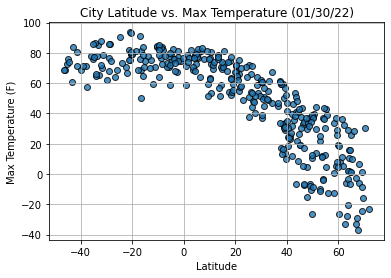

In [18]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

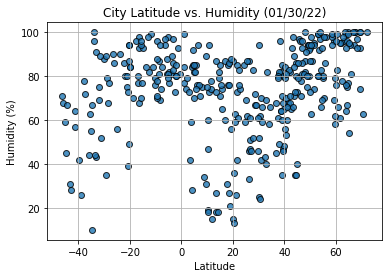

In [19]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

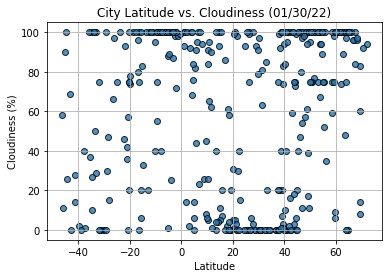

In [20]:
plt.scatter(lats, cloudiness,edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

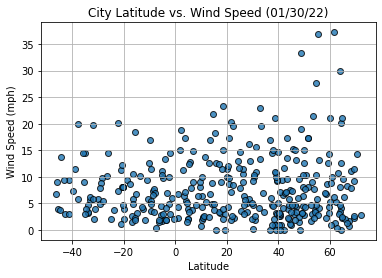

In [22]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()

## Linear Regression

In [25]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7268969123762066


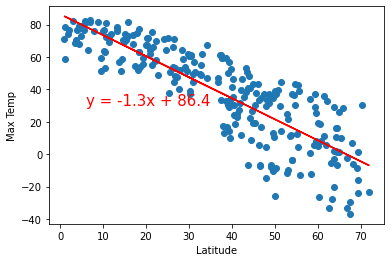

In [28]:
 # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.00866174528552781


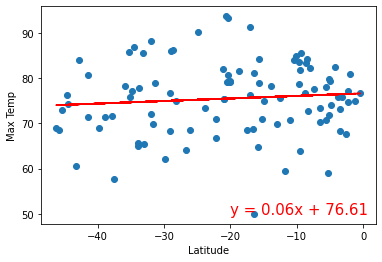

In [36]:
 # Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-20,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1684566709106551


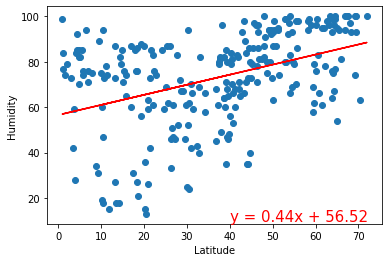

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3011050116327114


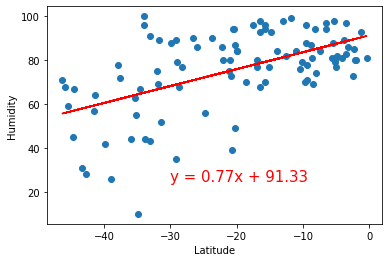

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30, 25))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08269777861257514


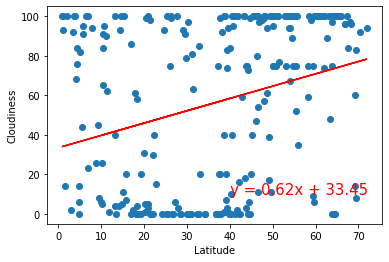

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21999590384640785


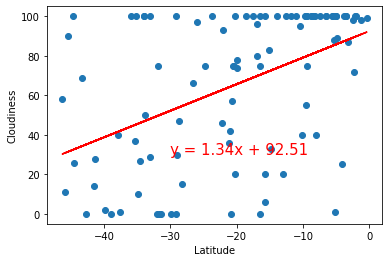

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00016209030299001807


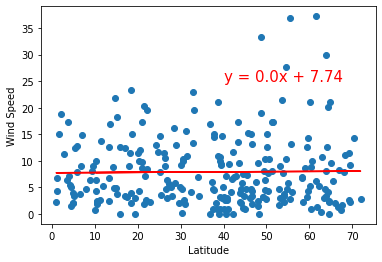

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02154368808597704


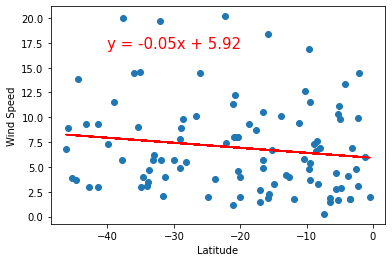

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-40, 17))